In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import re
import numpy as np
from konlpy.tag import Okt
from sklearn import preprocessing
import tensorflow
okt = Okt()

: 

: 

------

In [4]:
emotion_lyrics = pd.read_csv("../../Data/lstm_170.csv")

In [5]:
emotion_lyrics

,가사,감정
0,잠시 길을 잃었어 어디로 가야 하는지 정말 알 수가 없어 난 늘 너란 길만 걸었으니...,happy
1,내 심장이 내 사랑이 멈출 것 같아도 나 지금 아파 열이나 숨도 못 쉬어 멍든...,happy
2,기억해 복도에서 떠들다 같이 혼나던 우리 둘 벌서면서도 왜 그리도 즐거웠는지 ...,happy
3,In this moment I see you It always comes aroun...,happy
4,함께였었던 너 지금 어느 별에 있니 난 아직도 이별에 있어 흩어져가는 하늘에 나를...,happy
...,...,...
505,그러나 시간이 지나도 아물지 않는 일들이 있지 내가 날 온전히 사랑하지 못해서 맘...,indifference
506,세상에 처음 날 때 인연인 사람들은 손과 손에 붉은 실이 이어진 채 온다 했죠 당...,indifference
507,잡힐 듯 말듯한 그대 찻잔에 녹아 내리면 어여쁜 미소 전부 담진 못해 애타는 맘만 ...,indifference
508,흐르는 저 하늘을 물어채는 범처럼 태산에 날아들어 숨어드는 새처럼 동산을 뛰고 뛰...,indifference


In [6]:
emotion_lyrics_happy = emotion_lyrics[emotion_lyrics['감정']=='happy'].reset_index(drop=True)
emotion_lyrics_sad = emotion_lyrics[emotion_lyrics['감정']=='sad'].reset_index(drop=True)
emotion_lyrics_indifference = emotion_lyrics[emotion_lyrics['감정']=='indifference'].reset_index(drop=True)

In [7]:
len(emotion_lyrics_happy)

170

In [8]:
train_length_happy = emotion_lyrics_happy.가사.astype(str).apply(len)
train_length_happy.head()

0     537
1    1223
2     893
3    1012
4     513
Name: 가사, dtype: int64

TypeError: __init__() got an unexpected keyword argument 'nonposy'

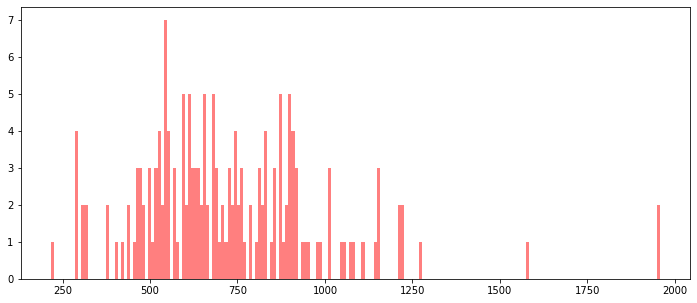

In [9]:
# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_length_happy, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log',nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')
plt.show()

In [10]:
print('길이 최대값: {}'.format(np.max(train_length_happy)))
print('길이 최대값: {}'.format(np.min(train_length_happy)))
print('길이 평균값: {:.2f}'.format(np.mean(train_length_happy)))
print('길이 표준편차: {:.2f}'.format(np.std(train_length_happy)))
print('길이 중간값: {}'.format(np.median(train_length_happy)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('길이 제1사분위: {}'.format(np.percentile(train_length_happy, 25)))
print('길이 제3사분위: {}'.format(np.percentile(train_length_happy, 75)))

길이 최대값: 1957
길이 최대값: 217
길이 평균값: 725.24
길이 표준편차: 263.80
길이 중간값: 680.0
길이 제1사분위: 547.0
길이 제3사분위: 872.0


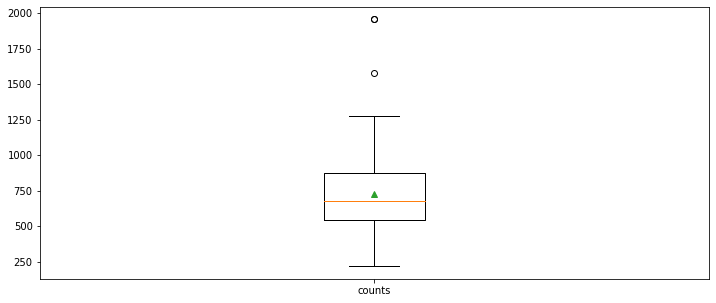

In [11]:
plt.figure(figsize=(12,5))
# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력학 데이터에 대한 라벨
# showmeans : 평균값을 마크함

plt.boxplot(train_length_happy, labels=['counts'], showmeans=True)
plt.show()

In [12]:
train_lyric_happy=[lyric for lyric in emotion_lyrics_happy.가사 if type(lyric) is str]

In [13]:
from wordcloud import WordCloud

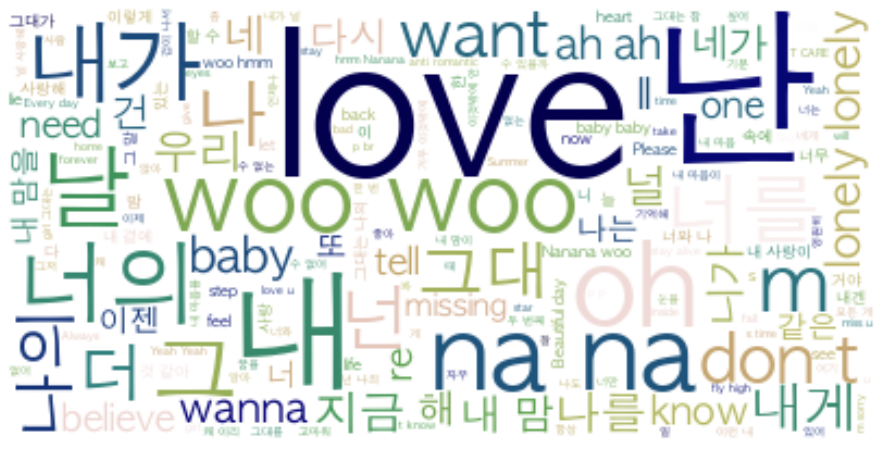

In [14]:
wordcloud=WordCloud(
    background_color='White',
    colormap= 'gist_earth',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate(' '.join(train_lyric_happy))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

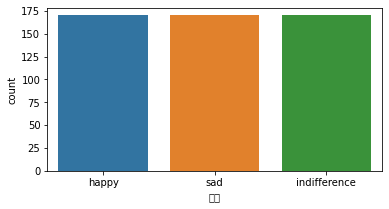

In [16]:
fig, axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(emotion_lyrics.감정)
plt.show()

In [47]:
# lyric_text

In [48]:
# lyric_text = okt.morphs(lyric_text)
# print(lyric_text)

In [49]:
# stop_words=set(['게','아니래','에','보이','고','이','드는','때','돼','조차','울','다가','단','한',\
#                 '번만','으로','했던','하겠니','것','의','할','수','까지','못','나로',"을","를","든","서",\
#                 "루","루루","가"])
# clean_lyric=[token for token in lyric_text if not token in stop_words]

# print(clean_lyric)

In [66]:
def preprocessing(lyric,okt,remove_stopwords = False,stop_words=[]):
    lyrics_text = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ+]"," ",lyric,count=1)
    lyrics_text1 = okt.morphs(lyrics_text,stem=True)
    if remove_stopwords:

        stop_words=set(['은','잘','반가','움','에','가','스럽던','새우','곤','참','시','의',\
                '아','의','그','를','도기','들참','이란','걸알','까','서','랑','되','할거니',\
                '시너','대로사','뭐','을','고기','에서','있죠우리','이','적','했고','와','이',\
                '같이','였단','을지','오래된것','보여인사','너','살','다가','도나','나나','울','인한',\
                '으로','돼','까지','이드','는','고','보이','말못','겠지','때','한','번만','단','까지나',\
                '때정','나로','수','로','오','엔','하','도','면'])
        clean_lyrics = [token for token in lyrics_text1 if not token in stop_words]
    return clean_lyrics

In [67]:
stop_words=set(['은','잘','반가','움','에','가','스럽던','새우','곤','참','시','의',\
                '아','의','그','를','도기','들참','이란','걸알','까','서','랑','되','할거니',\
                '시너','대로사','뭐','을','고기','에서','있죠우리','이','적','했고','와','이',\
                '같이','였단','을지','오래된것','보여인사','너','살','다가','도나','나나','울','인한',\
                '으로','돼','까지','이드','는','고','보이','말못','겠지','때','한','번만','단','까지나',\
                '때정','나로','수','로','오','엔','하','도',"아모","도","오낮","무"])

In [68]:
test_happy = []
for lyric in train_lyric_happy:
    if type(lyric) == str:
        test_happy.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        test_happy.append([])

In [94]:
test_happy

[['잠시',
  '길',
  '잃다',
  '어디',
  '가야',
  '하다',
  '정말',
  '알',
  '수가',
  '없다',
  '난',
  '늘',
  '란',
  '길',
  '만',
  '걸다',
  '낮',
  '괜찮다',
  '바쁘다',
  '지내다',
  '있다',
  '밤',
  '오다',
  '다시',
  '길',
  '잃다',
  '울다',
  '새벽',
  '되다',
  '모두',
  '사라지다',
  'my',
  'hope',
  'love',
  'sweet',
  'dreams',
  '워',
  '어떡하다',
  '워',
  '잘해주다',
  '말',
  '지',
  '왜',
  '그렇다',
  '이제',
  '막',
  '다른',
  '길',
  '워',
  '보내다',
  '싫다',
  '네',
  '눈',
  '쳐다보다',
  '너무',
  '미안하다',
  '니깐',
  '도리어',
  '내',
  '더',
  '미안하다',
  '버리다',
  '날',
  '안다',
  '네',
  '품',
  '차다',
  '좋다',
  '그리다',
  '쉬다',
  '떠나가다',
  '거',
  '면서',
  '왜',
  '널',
  '좋아하다',
  '만들다',
  '거야',
  '모두',
  '사라지다',
  'my',
  'hope',
  'love',
  'sweet',
  'dreams',
  '워',
  '어떡하다',
  '워',
  '마음',
  '열다',
  '말걸',
  '후회',
  '돼다',
  '젠',
  '막',
  '다른',
  '길',
  '워',
  '난',
  '아이',
  '인가',
  '보다',
  '그저',
  '온종일',
  '기만',
  '하다',
  '네',
  '없다',
  '무엇',
  '못',
  '하다',
  '어리광',
  '부리',
  '며',
  '헤매다',
  '뿐',
  '야',
  '잠시',
  '길',
  '잃다',
  '거야',
  'my',
  'hope',
 

In [95]:
len(test_happy)

170

In [96]:
import nltk

In [97]:
for i in test_happy:
    ko_h = nltk.Text(i)
ko_h.vocab().most_common(100)

[('루루', 12),
 ('루', 12),
 ('together', 6),
 ('멜로디', 6),
 ('하다', 4),
 ('작다', 3),
 ('가다', 3),
 ('보다', 3),
 ('걸음', 3),
 ('so', 3),
 ('happy', 3),
 ('we', 3),
 ('불다', 3),
 ('위', 3),
 ('세상', 2),
 ('하늘', 2),
 ('닮다', 2),
 ('길', 2),
 ('따르다', 2),
 ('어디', 2),
 ('걸다', 2),
 ('다시', 2),
 ('씩', 2),
 ('손', 2),
 ('잡고', 2),
 ('발', 2),
 ('맞추다', 2),
 ('are', 2),
 ('dancing', 2),
 ('서두르다', 2),
 ('마', 2),
 ('익숙하다', 2),
 ('찾다', 2),
 ('내', 2),
 ('모르다', 1),
 ('마냥', 1),
 ('웃기', 1),
 ('만', 1),
 ('푸른', 1),
 ('꿈', 1),
 ('가지다', 1),
 ('키', 1),
 ('꼬마', 1),
 ('어느새다', 1),
 ('담', 1),
 ('넘다', 1),
 ('언덕', 1),
 ('위로', 1),
 ('좁다', 1),
 ('트이다', 1),
 ('돌', 1),
 ('그만', 1),
 ('넘어지다', 1),
 ('일어나다', 1),
 ('좀', 1),
 ('더디다', 1),
 ('어떻다', 1),
 ('든', 1),
 ('좋다', 1),
 ('조금', 1),
 ('누구', 1),
 ('상상', 1),
 ('못', 1),
 ('내일', 1),
 ('또', 1),
 ('오다', 1),
 ('소나기', 1),
 ('자라나다', 1),
 ('무지개', 1),
 ('빌리다', 1),
 ('포켓', 1),
 ('속', 1),
 ('가득', 1),
 ('꼭', 1),
 ('넣다', 1),
 ('두다', 1),
 ('주문', 1),
 ('외우다', 1),
 ('it', 1),
 ("'", 1),
 ('s', 1),
 ('gonna

In [101]:
list(ko_h.vocab())

['루루',
 '루',
 'together',
 '멜로디',
 '하다',
 '작다',
 '가다',
 '보다',
 '걸음',
 'so',
 'happy',
 'we',
 '불다',
 '위',
 '세상',
 '하늘',
 '닮다',
 '길',
 '따르다',
 '어디',
 '걸다',
 '다시',
 '씩',
 '손',
 '잡고',
 '발',
 '맞추다',
 'are',
 'dancing',
 '서두르다',
 '마',
 '익숙하다',
 '찾다',
 '내',
 '모르다',
 '마냥',
 '웃기',
 '만',
 '푸른',
 '꿈',
 '가지다',
 '키',
 '꼬마',
 '어느새다',
 '담',
 '넘다',
 '언덕',
 '위로',
 '좁다',
 '트이다',
 '돌',
 '그만',
 '넘어지다',
 '일어나다',
 '좀',
 '더디다',
 '어떻다',
 '든',
 '좋다',
 '조금',
 '누구',
 '상상',
 '못',
 '내일',
 '또',
 '오다',
 '소나기',
 '자라나다',
 '무지개',
 '빌리다',
 '포켓',
 '속',
 '가득',
 '꼭',
 '넣다',
 '두다',
 '주문',
 '외우다',
 'it',
 "'",
 's',
 'gonna',
 'be',
 'alright',
 '이제',
 '아래',
 '눕다',
 '잠깐',
 '쉬다',
 '돼다',
 '눈',
 '감다',
 '보이다',
 '별',
 '고맙다',
 '인사',
 '건네다',
 '그게',
 '바로',
 '야',
 '더',
 '밝다',
 '온',
 '아침',
 '머나멀다',
 '여행',
 '떠나다',
 'belong',
 '혼자',
 '알다',
 '영원하다',
 '위해',
 '우릴',
 '지금',
 '앞',
 '있다']

In [ ]:
ko_h = list(ko_h.vocab())


In [74]:
from tensorflow import keras

In [76]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = train_lyric_happy
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if not word[1] in ["Josa","Eomi","Puntuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl = (" ".join(r).strip())
    
    okt_result.append(rl)

In [77]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [78]:
print((encoded[1]))

[64, 0, 0, 0, 0, 64, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 22, 0, 0, 0, 114, 0, 0, 104, 0, 22, 0, 0, 0, 0, 22, 0, 63, 0, 89, 22, 0, 0, 0, 73, 0, 0, 0, 0, 85, 0, 0, 78, 0, 22, 0, 0, 0, 0, 84, 0, 0, 80, 0, 3, 0, 0, 0, 0, 79, 0, 0, 0, 0, 0, 11, 84, 3, 0, 0, 3, 0, 80, 0, 81, 0, 0, 0, 0, 0, 0, 0, 0, 106, 68, 0, 0, 0, 63, 0, 77, 22, 0, 64, 0, 0, 0, 0, 0, 0, 16, 2, 0, 63, 0, 89, 22, 0, 64, 0, 73, 0, 0, 0, 0, 0, 22, 0, 63, 0, 0, 22, 0, 0, 0, 0, 22, 0, 0, 0, 16, 22, 0, 0, 0, 116, 22, 0, 0, 0, 0, 84, 0, 0, 80, 0, 3, 0, 0, 0, 0, 79, 0, 0, 0, 0, 3, 11, 84, 3, 0, 79, 3, 0, 80, 0, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 80, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 82, 0, 0, 0, 11, 84, 3, 0, 0, 0, 0, 0, 12, 11, 0, 0, 0, 0, 0, 0, 82, 0, 3, 0, 3, 0, 0, 0, 0, 0, 12, 0, 114, 0, 22, 0, 0, 0, 114, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 22, 0, 85, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 77, 22, 0, 16, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 0, 79, 0, 0, 29, 0, 0, 0, 3, 0, 80, 0, 81, 0, 108, 0, 82, 79, 0, 0, 22, 0, 0

가사의 최대 길이 : 1950
가사의 최소 길이 : 180
가사의 평균 길이 : 704.211765


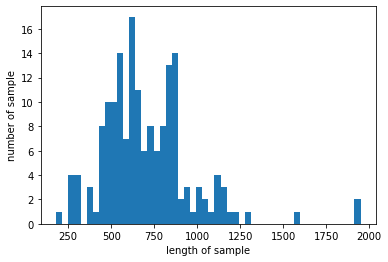

In [79]:
# 정해줄 길이를 찾기 위해 가장 긴 가사 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [80]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[88,  0,  0, ...,  0,  0,  0],
       [64,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [37, 22,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [15, 62,  0, ...,  0,  0,  0]], dtype=int32)

In [81]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

170 1950


In [82]:
# 분류항목(food,sports)를 수치로 변경하기
categories = emotion_lyrics['감정'].to_list()

def category_encode(category):
    if category == 'happy':
        return [1,0,0]
    elif category == 'sad':
        return [0,1,0]
    else:
        return [0,0,1]

In [335]:
encoded_category = [category_encode(category) for category in categories]
encoded_category

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1,

In [336]:
len(encoded_category)

510

In [337]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [338]:
# train val data 만들기
trainData, valData, trainTarget, valTarget = train_test_split(
    train_input, train_target, test_size=0.2
)

In [360]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.Embedding(vocab_size,5,input_length=max_length)) 
# one hot encoding 만드는 애
# Embedding(중복 없는 전체 단어 갯수,index,가장 간 문장의 단어 갯수 )
# 임베딩 레이어는 인덱스를 받아 5차원 벡터의 임베딩을 출력합니다.
model.add(keras.layers.LSTM(128))

# 분류 단계
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

In [361]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [362]:
import numpy as np
# train_X = np.array(padding_paragraphs_encoding)
# train_Y = np.array(encoded_category)

In [363]:
train_x = np.array(train_input)
train_y = np.array(train_target)

In [364]:
val_x = np.array(valData)
val_y = np.array(valTarget)

In [365]:
history = model.fit(
    train_x,
    train_y,
    epochs=100,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (val_x, val_y),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
13/13 [==============================] - 25s 2s/step - loss: 1.0994 - accuracy: 0.3113 - val_loss: 1.0983 - val_accuracy: 0.3537
Epoch 2/100
13/13 [==============================] - 20s 2s/step - loss: 1.0992 - accuracy: 0.3309 - val_loss: 1.0986 - val_accuracy: 0.3293
Epoch 3/100
13/13 [==============================] - 21s 2s/step - loss: 1.0987 - accuracy: 0.3407 - val_loss: 1.0987 - val_accuracy: 0.3293
Epoch 4/100
13/13 [==============================] - 21s 2s/step - loss: 1.0991 - accuracy: 0.3407 - val_loss: 1.0987 - val_accuracy: 0.3293
Epoch 5/100
13/13 [==============================] - 21s 2s/step - loss: 1.0991 - accuracy: 0.3407 - val_loss: 1.0991 - val_accuracy: 0.3293
Epoch 6/100
13/13 [==============================] - 21s 2s/step - loss: 1.0987 - accuracy: 0.3407 - val_loss: 1.0989 - val_accuracy: 0.3293
Epoch 7/100
13/13 [==============================] - 21s 2s/step - loss: 1.0988 - accuracy: 0.3407 - val_loss: 1.0989 - val_accuracy: 0.3293
Epoch 8/100
1

In [366]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.34029410481452943
val_accuracy : 0.32951220870018005


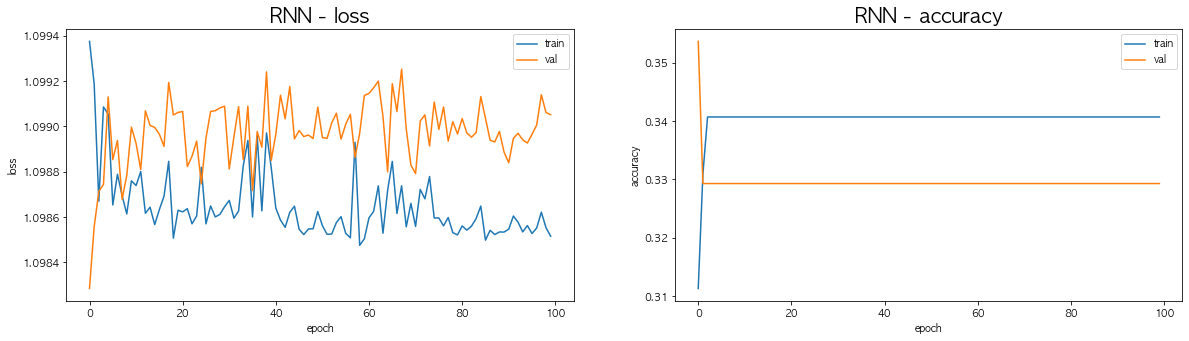

In [367]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

In [368]:
test_result = []
test_result.append(model.predict(test_input))

4/4 [==============================] - 1s 242ms/step


In [370]:
result = []
for i in range(0,102):    
    result.append(test_result[0][i])

In [372]:
test_result[0][101]

array([0.33150014, 0.34041172, 0.32808816], dtype=float32)

In [373]:
result[0:10]

[array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32)]